In [18]:
pip install openTSNE

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import seaborn as sns
import scanpy as sc
import symphonypy as sp
import matplotlib.pyplot as plt

In [3]:
sc.set_figure_params(dpi=80)
sns.set_style("ticks")

In [4]:
test_sample = sc.read_h5ad("../../annotated_cell_bins/regress_harmony/HZ12M01_PFC_regress_harmony.h5ad")

In [7]:
mask= test_sample.obs["datatype"] == "sn"
ref = test_sample[mask].copy()
mask= test_sample.obs["datatype"] == "cellbin"
target = test_sample[mask].copy()

In [12]:
target

AnnData object with n_obs × n_vars = 37909 × 4729
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'datatype', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RN

In [13]:
# Mapping Harmony coordinates
sp.tl.map_embedding(adata_query=target, adata_ref=ref, reference_primary_basis = 'X_pca_harmony')

/public/home/jijh/micromamba/envs/spatial/lib/python3.11/site-packages/symphonypy/tools.py:307: UserWarning: Not found `harmony` object in adata_ref.uns.
Assuming that adata_ref doesn't have any batches, and using 'X_pca_harmony' representation of adata_ref for clustering.
Otherwise, firstly run symphonypy.pp.harmony_integrate on adata_ref to account for them.
  warnings.warn(


In [25]:
target

AnnData object with n_obs × n_vars = 37909 × 4729
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'datatype', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RN

In [27]:
tSNE_model = sp.tl.tsne(ref, use_rep="X_pca_harmony", return_model=True)
sp.tl.tsne(adata_query, use_rep="X_pca_harmony", use_model=tSNE_model)

NameError: name 'adata_query' is not defined

<Axes: title={'center': 'Query dataset'}, xlabel='tSNE1', ylabel='tSNE2'>

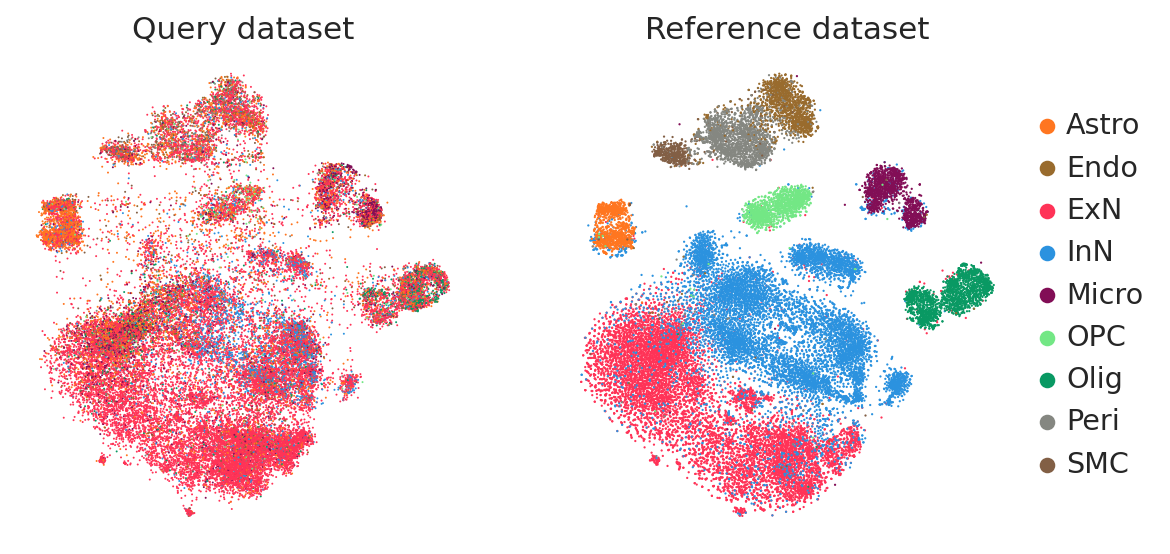

In [21]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)

sc.pl.tsne(
    ref,
    frameon=False,
    color = "celltype",
    title="Reference dataset",
    ax=axes[1],
    show=False,
)

sc.pl.tsne(
    target,
    frameon=False,
    color = "celltype",
    title="Query dataset",
    ax=axes[0],
    show=False,
    legend_loc=None,
)

In [32]:
ref

AnnData object with n_obs × n_vars = 29395 × 4729
    obs: 'Unnamed: 0', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'orig.ident', 'x', 'y', 'fine', 'genotype', 'month', 'sample', 'slice', 'id_A', 'age', 'nearest_plaque', 'interval', 'min_center_dist', 'min_border_dist', 'plaque_region', 'celltype', 'nCount_SCT', 'nFeature_SCT', 'nearest_index', 'struct_id', 'acronym_x', 'id_B', 'atlas_id', 'name', 'acronym_y', 'st_level', 'ontology_id', 'hemisphere_id', 'weight', 'parent_structure_id', 'depth', 'graph_id', 'graph_order', 'structure_id_path', 'color_hex_triplet', 'neuro_name_structure_id', 'neuro_name_structure_id_path', 'failed', 'sphinx_id', 'structure_name_facet', 'failed_facet', 'safe_name', 'total_voxel_counts (10 um)', 'Structure independently delineated (not merged to form parents)', 'Major Division', '"Summary Structure" Level for Analyses', 'Structure Name', 'datatype', 'nCount_RNA', 'nFeature_RNA', 'batch', 'plaque', 'plaque_delta', 'percent.mito', 'percent.rb', 'RN

In [28]:
test = sc.tl.ingest(target, ref, inplace = False)

ValueError: all input arrays must have the same shape